## Marketing Analytics

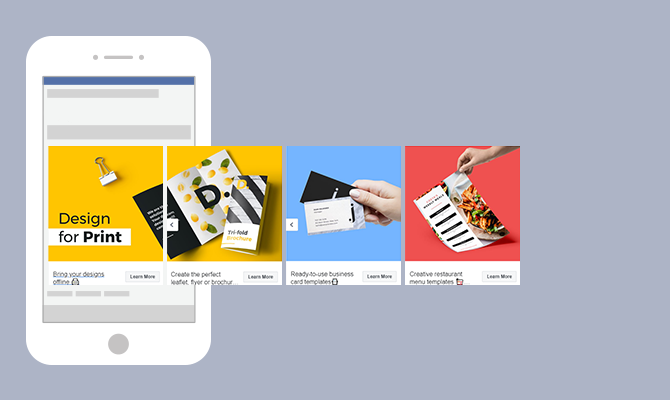

In [1]:
from IPython.display import Image
Image(filename='marketing.png', width=500, height=200)

### Introduction
This notebook will accomplish the following task:

#### Overall goal:
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

#### Section 01: Exploratory Data Analysis

Are there any null values or outliers? How will you wrangle/handle them?
Are there any variables that warrant transformations?
Are there any useful variables that you can engineer with the given data?
Do you notice any patterns or anomalies in the data? Can you plot them?
Which marketing campaign is most successful?

#### Section 02: Statistical Analysis
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

What factors are significantly related to the number of store purchases?
Does US fare significantly better than the Rest of the World in terms of total purchases?
Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
Is there a significant relationship between geographical regional and success of a campaign?

#### Section 03: Data Visualization
Please plot and visualize the answers to the below questions.

What does the average customer look like for this company?
Which products are performing best?
Which channels are underperforming?

In [31]:
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from tabulate import tabulate

In [21]:
# creating the date object of today's date
todays_date = date.today()

In [99]:
df = pd.read_csv('marketing_data.csv')

In [4]:
# Removing white spaces from column names.
df.columns = df.columns.str.replace(' ', '')

In [5]:
# Removing $ sign from Income field.
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


### Section 01: Exploratory Data Analysis

#### Are there any null values or outliers? How will you wrangle/handle them?

In [6]:
# Yes there are some null values. There are a 24 null values in the Income field.
# We can handle handle these null values by either dropping rows of data in the other fields so they match up with the 
# Income field or we can take take the average income and replace the missing values with that value.
df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,8/31/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,NaN
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


#### Are there any variables that warrant transformations?

#### Are there any useful variables that you can engineer with the given data?

#### Do you notice any patterns or anomalies in the data? Can you plot them? Which marketing campaign is most successful?

#### Which marketing campaign is most successful?

It would be the response campaign as 15% of customers accept an offer from that campaign.

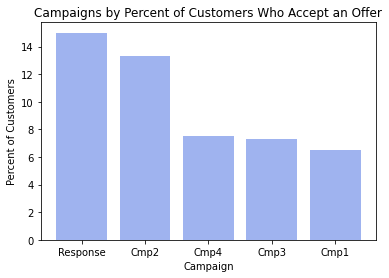

In [7]:
objects = ('Response', 'Cmp2', 'Cmp4', 'Cmp3', 'Cmp1')
y_pos = np.arange(len(objects))
performance = [15,13.3,7.5,7.3,6.5]

plt.bar(y_pos, performance, align='center', alpha=0.5,  color='royalblue')
plt.xticks(y_pos, objects)
plt.xlabel('Campaign')
plt.ylabel('Percent of Customers')
plt.title('Campaigns by Percent of Customers Who Accept an Offer')
# plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.9)
plt.show()

In [8]:
# Calculating the percent of customers who accepted an offer after the last campaign. Here we can see that it's 15% 
# This is the most successful campaign.
df['Response'].value_counts(normalize=True)

0    0.850893
1    0.149107
Name: Response, dtype: float64

In [9]:
# Calculating the percent of customers who accepted an offer after the first campaign. Here we can see that it's 6.5%
df['AcceptedCmp1'].value_counts(normalize=True)

0    0.935714
1    0.064286
Name: AcceptedCmp1, dtype: float64

In [10]:
# Calculating the percent of customers who accepted an offer after the second campaign. Here we can see that it's 13.3%
df['AcceptedCmp2'].value_counts(normalize=True)

0    0.986607
1    0.013393
Name: AcceptedCmp2, dtype: float64

In [11]:
# Calculating the percent of customers who accepted an offer after the third campaign. Here we can see that it's 7.3%
df['AcceptedCmp3'].value_counts(normalize=True)

0    0.927232
1    0.072768
Name: AcceptedCmp3, dtype: float64

In [12]:
# Calculating the percent of customers who accepted an offer after the fourth campaign. Here we can see that it's 7.5%
df['AcceptedCmp4'].value_counts(normalize=True)

0    0.925446
1    0.074554
Name: AcceptedCmp4, dtype: float64

### Section 02: Statistical Analysis
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

What factors are significantly related to the number of store purchases?
Does US fare significantly better than the Rest of the World in terms of total purchases?
Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
Is there a significant relationship between geographical regional and success of a campaign?

### Section 03: Data Visualization
Please plot and visualize the answers to the below questions.

What does the average customer look like for this company?
Which products are performing best?
Which channels are underperforming?

#### What does the average customer look like for this company?

In [72]:
data = [['Age', 52], 
        ['Income', 52247], 
        ['Education', 'Masters Degree or Higher'], 
        ['Marital Status', 'Couple'],
        ['Children', 'At Most 1']
       ]
 
average_customer = pd.DataFrame(data, columns = ['', 'Average Customer'])
 
average_customer

,,Average Customer
0,Age,52
1,Income,52247
2,Education,Masters Degree or Higher
3,Marital Status,Couple
4,Children,At Most 1


In [46]:
# Average customer is 52 years old. 
todays_date.year - df['Year_Birth'].mean()

52.19419642857133

In [14]:
# Average customer makes $52,247.25 a year.
df['Income'].mean()

52247.25135379061

In [28]:
# Majority have a masters degree or higher. Meaning they're extremely educated.
df['Education'].value_counts(normalize=True)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64

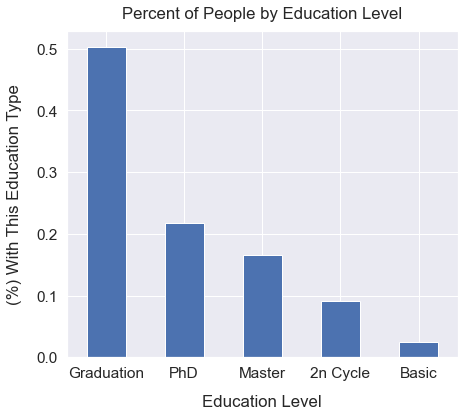

In [93]:
sns.set(font_scale=1.4)
df['Education'].value_counts(normalize=True).plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Education Level", labelpad=14)
plt.ylabel("(%) With This Education Type", labelpad=14)
plt.title("Percent of People by Education Level", y=1.02);

In [27]:
# More than half are seeing someone.
df['Marital_Status'].value_counts(normalize=True)

Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64

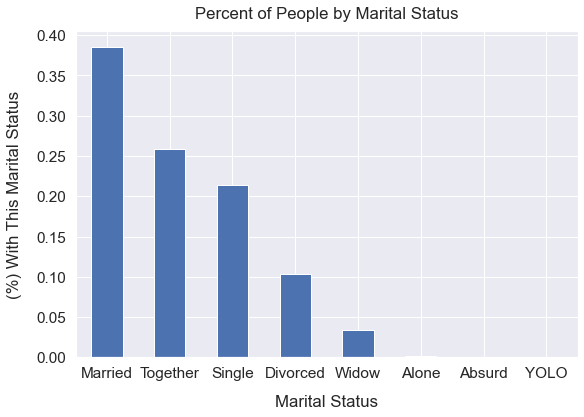

In [83]:
sns.set(font_scale=1.4)
df['Marital_Status'].value_counts(normalize=True).plot(kind='bar', figsize=(9,6), rot=0)
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("(%) With This Marital Status", labelpad=14)
plt.title("Percent of People by Marital Status", y=1.02);

In [29]:
# Majority don't have children and if they do it's 1 child at most.
df['Kidhome'].value_counts(normalize=True)

0    0.577232
1    0.401339
2    0.021429
Name: Kidhome, dtype: float64

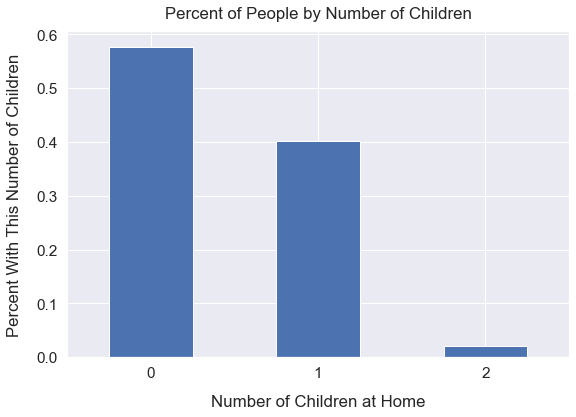

In [88]:
sns.set(font_scale=1.4)
df['Kidhome'].value_counts(normalize=True).plot(kind='bar', figsize=(9,6), rot=0)
plt.xlabel("Number of Children at Home", labelpad=14)
plt.ylabel("Percent With This Number of Children", labelpad=14)
plt.title("Percent of People by Number of Children", y=1.02);

#### Which products are performing best?

In [98]:
# MntWines sells the best at 303.93
# Followed by ....at

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 #### Which channels are underperforming?